# HW1: Practice with Python, hard-margin SVM, and linear regression

Reid Sroda rgsroda@wisc.edu

Hello Students:

- Start by downloading HW1.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- I've included the output from my solution in HW1.html so you can check your
  work. Your output should match or be close to mine. Use 3 significant
  figures for floats. e.g. We can print 3 figures for 𝜋/1000 as
  print(f'{np.pi/1000:.3}'). The pattern is print(f'{x:.precision}'),
  where x is the value to print and precision is the number of figures.
- If you have questions, please ask them in class or office hours. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- Please clean up your code:
  - Comment out unnecessary code that is useful for orienting you, like printing the data set.
  - Label your output, like writing 'weight=20.1' or 'The weight is 20.1' rather than just '20.1'.
  - Simplify your code if you can.
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW01.ipynb to Canvas's HW01.ipynb assignment
  - HW01.html to Canvas's HW01.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2a, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, linear_model

# 1. Use a hard-margin SVM
 to classify cars as having automatic or manual transmissions.
- Read [http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv](http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv) into a DataFrame. (This is the mtcars data frame from R with two of its rows removed to get linearly separable data.)
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv', index_col=0).)
- Make X from the mpg (miles per gallon) and wt (weight in 1000s of pounds) columns. Make y from the am column (where 0=automatic
  or 1=manual transmission).
- Train an SVM using kernel='linear' and C=1000. Print its coefficients and intercept.
- Report the training accuracy. (It's given by clf.score(X, y).)
- Predict the transmission for a car weighing 4000 pounds (wt=4) that gets 20 mpg.
- Use five plt.plot() calls to make a figure with wt on its x-axis and mpg on its y-axis including:
  - the automatic transmission cars in red
  - the manual transmission cars in blue
  - the decision boundary (the center line of the road)
  - the lower margin boundary (the left side of the road)
  - the upper margin boundary (the right side of the road)
  - a reasonable title, axis labels, and legend

In [2]:
data = pd.read_csv("mtcars30.csv", index_col = 0)
data = data.rename(columns = {'mpg':'x1', 'wt':'x2'})
data

,x1,cyl,disp,hp,drat,x2,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [3]:
X = data[['x1', 'x2']]
y = data['am']
clf = svm.SVC(kernel = 'linear', C=1000)
clf.fit(X,y)
print(f'The decision boundary is {clf.coef_[0][0]:.3} * mileage + {clf.coef_[0][1]:.3} * weight + {clf.intercept_} = 0.')
print(f'score = {clf.score(X,y)}')
X_new = pd.DataFrame({'x1': [20], 'x2': [4]})
print(f'We predict that a car weighing 20 thousand pounds that gets 20 mpg has transmission type {clf.predict(X_new)} which means automatic') 

The decision boundary is -0.309 * mileage + -8.24 * weight + [32.01974189] = 0.
score = 1.0
We predict that a car weighing 20 thousand pounds that gets 20 mpg has transmission type [0] which means automatic


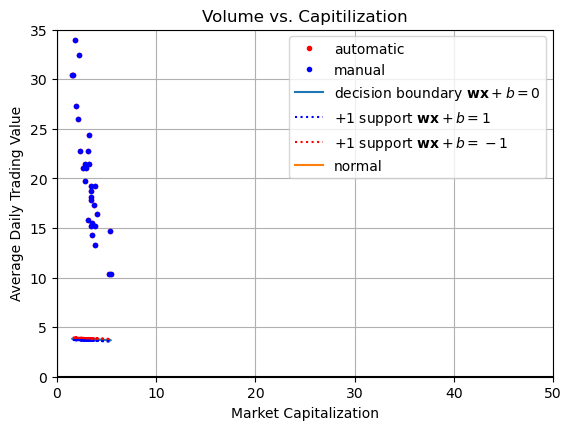

In [4]:
plt.plot(data.x2, data.x1, ".", color = 'red', label='automatic')
plt.plot(data.x2, data.x1, ".", color = 'blue', label='manual')
plt.axis('square')
plt.grid()
plt.title("Volume vs. Capitilization")
plt.xlabel("Market Capitalization")
plt.ylabel("Average Daily Trading Value")
plt.xlim(0,50)
plt.ylim(0,35)
x1 = data.x2
x2 = -(clf.coef_[0][0] * x1 + clf.intercept_) / clf.coef_[0][1]
plt.plot(x1, x2, label=r'decision boundary $\mathbf{wx} + b = 0$')
plt.plot(x1, x2 + 1 / clf.coef_[0][1], linestyle=':', color='blue', label=r'+1 support $\mathbf{wx} + b =  1$')
plt.plot(x1, x2 - 1 / clf.coef_[0][1], linestyle=':', color='red', label=r'+1 support $\mathbf{wx} + b = -1$')
plt.plot([0, clf.coef_[0][0]], [0, clf.coef_[0][1]], label=r'normal') # arguments are x1, x2, y1, y2
plt.axvline(x=0, c='k')
plt.axhline(y=0, c='k')
plt.legend()
plt.show(block=False)

# 2. Make three linear regression models.


## 2a: Make a simple regression model by hand.
Use the matrix formula $w = (X^T X)^{-1} X^T y$ we developed in class to fit these three points:
(0, 5), (2, 1), (4, 3). (Use linear_model.linearRegression(), if you wish, to check your work.)

In [5]:
#solved by hand on paper
intercept = 4.0
slope = -0.5
print(f'y = {slope}x + {intercept}')

y = -0.5x + 4.0


## 2b: Make a simple linear regression model from real data.
Estimate the average daily trading volume of a Dow Jones Industrial Average stock from its market capitalization. That is, use $y = $ AvgVol vs. $x =$ MarketCap.
- Read [http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv](http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv) into a DataFrame.
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv', index_col='Symbol').)
- Find the model. Print its equation.
- Print its $R^2$ value (the proportion of variability in $y$ accounted for by $x$ via the linear model, given by model.score(X, y)).
- Make a plot of the data and model line.
- Use the model to predict the volume for a company with market capitalization of 0.25e12 (a quarter-trillion dollars); add this as a red point on your plot.
- Say what happens to Volume as Market Capitalization increases. (Use a Markdown cell.)

In [6]:
df = pd.read_csv("http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv", index_col="Symbol")
model = linear_model.LinearRegression()
X = df[['MarketCap']]
y = df['AvgVol']
model.fit(X, y)
intercept = model.intercept_
slope = model.coef_[0]
print(f'Volume = {slope:.3} * MarketCap + {intercept:.3}')
print(f'score = {model.score(X,y):.3}')
xval = 0.25e12
prediction = model.predict(pd.DataFrame({'MarketCap': [0.25e12]}))[0]
print(f'We predict a Volume of {prediction:.3}')

Volume = 2.68e-05 * MarketCap + 3.41e+06
score = 0.705
We predict a Volume of 1.01e+07


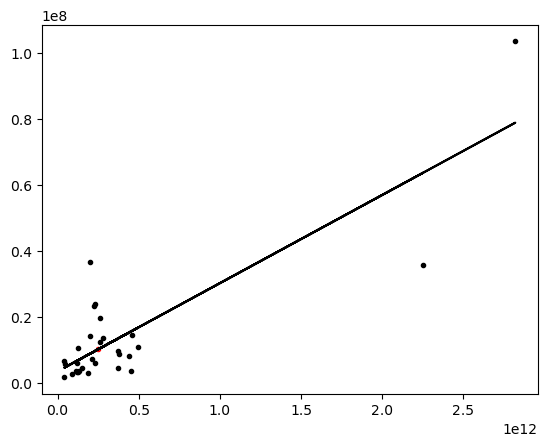

In [7]:
plt.plot(df['MarketCap'], df['AvgVol'], ".", color = 'black')
plt.plot(0.25e12, prediction, ".", color = 'red')
yhat = model.predict(X)
x = df.MarketCap
plt.plot(x, yhat, color='black')

In [8]:
#As market capilization increases we also see in increase in volume of industrial average stock

## 2c Make a multiple regression model.
Estimate the same volume from both market capitalization and price. That is, use $y =$ AvgVol vs. $x_1 =$ MarketCap and $x_2 =$ Price.
- Find the model.
- Print its equation.
- Print its $R^2$ value.
- Say what happens to Volume as Market Capitalization increases and what happens to Volume as Price increases (while holding the other variable fixed). (Use a Markdown cell.)

In [9]:
X = df[['MarketCap', 'Price']]
y = df['AvgVol']
model = linear_model.LinearRegression()
model.fit(X,y)
model.coef_
model.intercept_
print(f'AvgVol = {model.coef_[0]:.3} * MarketCap + {model.coef_[1]:.3} * Price + {model.intercept_:.3}')
print(f'Score = {model.score(X,y):.3}')

AvgVol = 2.89e-05 * MarketCap + -6.69e+04 * Price + 1.44e+07
Score = 0.823


In [10]:
#As market capitalization increases so does the average volume and as the price increases the average volume decreases